In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [569]:
df = pd.read_csv('zuu crew scores.csv')
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [570]:
df = df[df['CourseName'] == 'Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [571]:
df['Pass or Fail'] = df['CapstoneScore'] >= 75
df

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore,Pass or Fail
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3,False
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8,True
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4,False
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1,False
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2,False
...,...,...,...,...,...,...,...,...,...,...,...
138,Student_139,3,89.3,42.7,2,0,96.9,2.5,Foundations of ML,56.2,False
139,Student_140,2,68.6,97.5,7,0,75.0,5.0,Foundations of ML,83.6,True
144,Student_145,3,79.9,35.6,6,1,32.4,3.9,Foundations of ML,43.6,False
145,Student_146,3,83.9,13.3,6,0,48.9,2.9,Foundations of ML,31.9,False


In [572]:
X = df['TotalHours'].values.reshape(-1, 1)
Y = df['Pass or Fail'].values

In [573]:
Y

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False, False])

In [574]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Z = np.array([-10000000000, 0, 10000000000])
for z in Z:
    print(f"z: {z} -> sigmoid(z): {sigmoid(z)}")

z: -10000000000 -> sigmoid(z): 0.0
z: 0 -> sigmoid(z): 0.5
z: 10000000000 -> sigmoid(z): 1.0


C:\Users\User\AppData\Local\Temp\ipykernel_17984\1474430664.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [575]:
def compute_cost(y_hat, Y):
    pos_component = np.sum(Y * np.long(y_hat))
    neg_component = np.sum((1 - Y) * (1 - np.log(y_hat)))

    m = len(Y)
    return (-1/m) * (pos_component + neg_component)

In [576]:
def compute_gradients(X, Y, y_hat):
    m = len(Y)

    """
    beta0, beta1    
    """

    dJ_dbeta1 = (1 / m) * X.T.dot(y_hat - Y)
    dJ_dbeta0 = (1 / m) * np.sum(y_hat - Y)

    return dJ_dbeta0, dJ_dbeta1

In [577]:
beta = np.random.randn(2)
print(f"beta values : {beta}")

beta0 = beta[0]
beta1 = beta[1]

lr = 0.00000001
n_iter = 1000

beta values : [-1.12220871  0.2703835 ]


In [578]:
cost_history = []
for i in range(n_iter):

    z = beta0 + X.dot(beta1)
    y_hat = sigmoid(z)

    dJ_dbeta0, dJ_dbeta1 = compute_gradients(X, Y, y_hat)

    beta0 = beta0 - lr * dJ_dbeta0
    beta1 = beta1 - lr * dJ_dbeta1

    cost = compute_cost(y_hat, Y)
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")

Iteration 0: Cost = -60.5579
Iteration 100: Cost = -60.5583
Iteration 200: Cost = -60.5587
Iteration 300: Cost = -60.5591
Iteration 400: Cost = -60.5595
Iteration 500: Cost = -60.5599
Iteration 600: Cost = -60.5603
Iteration 700: Cost = -60.5608
Iteration 800: Cost = -60.5612
Iteration 900: Cost = -60.5616


In [579]:
print(f"best beta : {beta0}, {beta1}, shape: {beta1.shape}") 
print(f"final cost : {cost_history[-1]}")

best beta : -1.122802361880547, [[0.26982339 0.27038464 0.26982339 0.26982339 0.26982339 0.27038464
  0.26982339 0.26982339 0.26982339 0.26982339 0.26982339 0.26982339
  0.26982339 0.26982339 0.26982339 0.26982339 0.27038464 0.26982339
  0.26982339 0.27038464 0.26982339 0.26982339 0.26982339 0.27038464
  0.27038464 0.26982339 0.26982339 0.26982339 0.26982339 0.26982339
  0.27038464 0.26982339 0.26982339 0.26982339 0.26982339 0.26982339
  0.26982339 0.26982339 0.26982339 0.26982339 0.26982339 0.26982339
  0.26982339 0.26982339 0.26982339 0.26982339 0.26982339 0.26982339
  0.26982339 0.26982339 0.26982339 0.26982339 0.26982339 0.27038464
  0.26982339 0.27038464 0.26982339 0.26982339 0.27038464 0.26982339
  0.26982339 0.26982339 0.26982339 0.27038464 0.26982339 0.26982339
  0.26982339 0.26982339 0.27038464 0.26982339 0.26982339 0.26982339]], shape: (1, 72)
final cost : -60.56200610600432


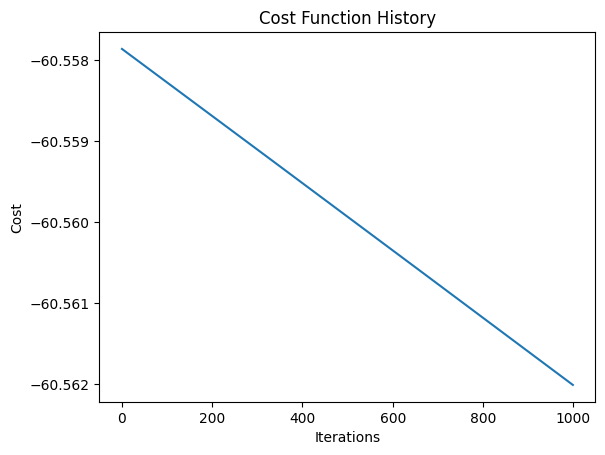

In [581]:
plt.plot(cost_history)
plt.title('Cost Function History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()